In [1]:
from sklearn.datasets import load_digits, make_blobs
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns
from random import choice
import numpy as np
from numpy.random import rand
import pandas as pd
     

In [2]:
mnist = load_digits()
     

In [3]:
sample = mnist['images']
     

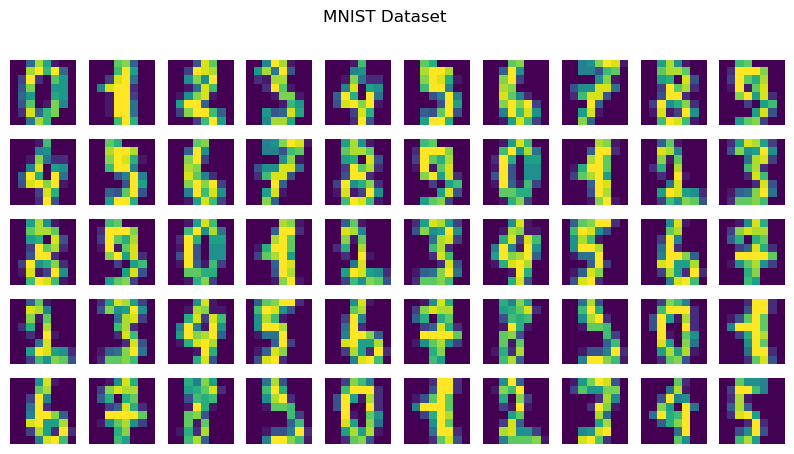

In [89]:
ncols = 10
nrows = 5
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10, 5))
for i in range(nrows):
  for j in range(ncols):
    ax[i,j].imshow(sample[i*4+j])
    ax[i,j].set_axis_off()
fig.suptitle('MNIST Dataset')
plt.show()
     

In [54]:
data = mnist['data'] # flatten data
     

In [62]:
from sklearn.datasets import make_blobs
     


In [63]:
d, tar = make_blobs(n_features=2, centers=10, cluster_std=0.4, n_samples=200)
     

In [64]:
x = d[:,0]
y = d[:,1]
     

In [65]:
da = pd.DataFrame({
    'x' : d[:,0],
    'y' : d[:,1],
    't' : tar
})
    

In [66]:
d
     


array([[ -0.6799647 ,   3.42727721],
       [ -1.30229838,   3.60746196],
       [ -9.51605421,   1.54104414],
       [ -5.19086369,   6.71169887],
       [ -7.46834859,   0.87675586],
       [-10.30619945,   1.59642523],
       [ -5.62579477,   6.66451701],
       [ -4.19187132,  -8.97346409],
       [ -2.93423548,   1.78239794],
       [ -9.880384  ,   2.83474971],
       [ -4.66910049,  -8.25231867],
       [ -4.80007613,   6.63949856],
       [ -3.86772855,   8.05645196],
       [ -2.50351703,   1.65599179],
       [ -2.77608669,   2.107782  ],
       [  2.76627155,   7.63127944],
       [ -9.68763818,   1.52005528],
       [ -1.00911758,   3.60866563],
       [  4.44612971,  -6.13589678],
       [ -3.5826034 ,   2.5208595 ],
       [ -9.67975559,   1.23216693],
       [ -3.99734359,   7.28537665],
       [-10.27368666,   2.09026399],
       [ -4.16219027,   7.93581669],
       [ -3.76353588,   7.62133282],
       [ -4.33784302,   7.49917038],
       [  9.1043149 ,  10.17472626],
 

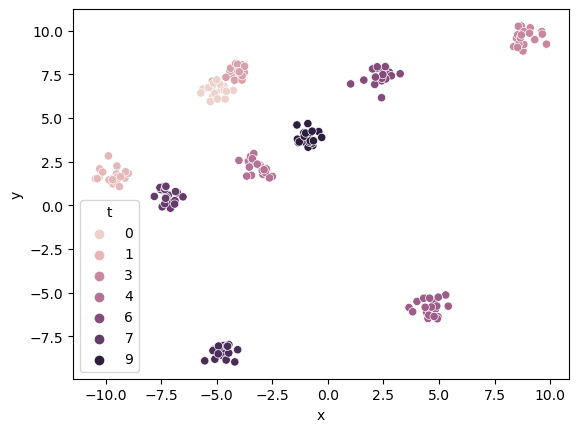

In [67]:
sns.scatterplot(data=da, x='x', y='y', hue='t')
plt.show()
     


In [72]:
def create_means(k, dim, mean_bounds):
  min = mean_bounds[0]
  max = mean_bounds[1]
  means = np.random.uniform(min, max, size=(k, dim))
  return means
     

In [73]:
np.random.uniform(0, 1, size=(10, 64))
     


array([[0.81123829, 0.23028411, 0.1639541 , 0.66511048, 0.73711061,
        0.01232344, 0.22512767, 0.68310681, 0.92827444, 0.92180427,
        0.1386269 , 0.97718138, 0.77109924, 0.5643947 , 0.16678007,
        0.16100625, 0.30357905, 0.85972636, 0.68458613, 0.24297516,
        0.1405031 , 0.52390254, 0.83827136, 0.12506494, 0.83930912,
        0.94201614, 0.02898395, 0.28186301, 0.66375704, 0.14676332,
        0.93231537, 0.63029612, 0.90887634, 0.45931637, 0.46410517,
        0.74423031, 0.38715442, 0.97251813, 0.56026352, 0.14923949,
        0.63590218, 0.85767176, 0.28035721, 0.48998953, 0.18401509,
        0.11770177, 0.94785084, 0.32993505, 0.37439914, 0.76264128,
        0.11446775, 0.69515549, 0.11375977, 0.23386591, 0.41616749,
        0.00272903, 0.15990022, 0.8218523 , 0.89404924, 0.20190393,
        0.57493853, 0.20580228, 0.78107253, 0.9786632 ],
       [0.22269935, 0.89627238, 0.14410112, 0.81590318, 0.75130361,
        0.57688045, 0.43977452, 0.88571717, 0.71396752, 0.4

In [74]:
def assignate(data, means):
  assignations = []
  for point in data:
    distances = [np.linalg.norm(point-means[i]) for i in range(len(means))]
    point_cluster = np.argmin(distances)
    assignations.append(point_cluster)
  return assignations
     

In [75]:
def clusterize(data, assignations, k):
  clusters = [[] for _ in range(k)]
  for j in range(len(assignations)):
    assignation = assignations[j]
    point = data[j]
    clusters[assignation].append(point)
  return clusters

In [76]:
def update_means(data, clusters, old_means, k, dim, mean_bounds):
  means = [np.zeros(2) for _ in range(k)]
  i=0
  for cluster in clusters:
    if len(cluster)==0:
      min = mean_bounds[0]
      max = mean_bounds[1]
      means[i] = np.random.uniform(min, max, size=(k, dim)) #old_means[i]
      #print(f'{i} is empty {old_means[i]}')
      i+=1
      continue
    mean = np.mean(cluster, axis=0)
    means[i] = mean
    i+=1
    #print(np.array(cluster).shape)
  return np.array(means, dtype=object)
     


In [77]:
def delta(i, j):
  if i==j:
    return 0.0
  else:
    return 1.0
     


In [78]:
def loss_function(data, assignations, clusters, means, k):
  loss = 0
  for i in range(len(means)):
    mean = means[i]
    for j in range(len(data)):
      point = data[j]
      #print(f'j:{j}, las:{len(assignations)}, pm:{len(point)},{len(mean)}')
      loss += delta(i, assignations[j])*np.linalg.norm(point-mean)
  return loss/len(data)

In [79]:
def fit_k_means(data, k, dim, mean_bounds,max_iter=100, tolerance=1e-2, live_plot=False, metrics=False):
  means = create_means(k=k, dim=dim, mean_bounds=mean_bounds)
  for _ in range(max_iter):
    assignations = assignate(data, means)
    clusters = clusterize(data, assignations, k)
    old_means = means
    means = update_means(data, clusters, means, k, dim, mean_bounds)
    #print(means)
    change = np.mean([np.linalg.norm(means[i]-old_means[i]) for i in range(len(means))])
    if change < tolerance:
      break
    if metrics==True:
      print(f'Change: {change}')
      print(f'Loss: {loss_function(data, assignations, clusters, means, k)}')
    if live_plot==True:
      summary = pd.DataFrame({
        'x': data[:, 0],
        'y': data[:, 1],
        'cluster': assignations
      })
      plt.figure(figsize=(6, 6))
      sns.scatterplot(data=summary, x='x', y='y',hue='cluster')
      plt.scatter(means[:,0], means[:,1], color='r')
      plt.show()
  return np.array(assignations)
     

In [80]:
print('v1.5.8')

v1.5.8


In [81]:
import numpy as np
from sklearn.preprocessing import MinMaxScaler
     

In [82]:
class KMeans():
  def __init__(self, k):
    self.k = k

  def fit(self, data, mean_bounds=(0, 1.0), max_iter=100000, tolerance=1e-2, live_plot=False, verbose=0):
    self.data = data
    self.dim = len(self.data[0])
    self.normalize()
    means = self.create_means(mean_bounds=mean_bounds)
    for _ in range(max_iter):
      self.assignations = self.assignate(means)
      clusters = self.clusterize(self.assignations)
      old_means = means
      print(means)
      means = self.update_means(clusters, mean_bounds)
      #print(means)
      change = np.mean([np.linalg.norm(means[i]-old_means[i]) for i in range(len(means))])
      if change < tolerance:
        break
      if verbose==1:
        print(f'Change: {change} | Loss: {self.loss(self.assignations, clusters, means)} \n \n')
      if live_plot==True:
        summary = pd.DataFrame({
          'x': self.data[:, 0],
          'y': self.data[:, 1],
          'cluster': self.assignations
        })
        plt.figure(figsize=(6, 6))
        sns.scatterplot(data=summary, x='x', y='y',hue='cluster')
        plt.scatter(means[:,0], means[:,1], color='r')
        plt.show()
    return np.array(self.assignations)
    
  def loss(self, assignations, clusters, means):
    loss = 0
    for i in range(len(means)):
      mean = means[i]
      for j in range(len(self.data)):
        point = self.data[j]
        #print(f'j:{j}, las:{len(assignations)}, pm:{len(point)},{len(mean)}')
        loss += self.delta(i, assignations[j])*np.linalg.norm(point-mean)
    return loss/len(self.data)

  def delta(self, i, j):
    if i==j:
      return 0.0
    else:
      return 1.0
      
  def update_means(self, clusters, mean_bounds):
    means = [np.zeros(self.dim) for _ in range(self.k)]
    i=0
    for cluster in clusters:
      if len(cluster)==0:
        min = mean_bounds[0]
        max = mean_bounds[1]
        means[i] = np.random.uniform(min, max, size=(self.k, self.dim)) #old_means[i]
        #print(f'{i} is empty {old_means[i]}')
        i+=1
        continue
      mean = np.mean(cluster, axis=0)
      means[i] = mean
      i+=1
      #print(np.array(cluster).shape)
    return np.array(means, dtype=object)

  def clusterize(self, assignations):
    clusters = [[] for _ in range(self.k)]
    for j in range(len(assignations)):
      assignation = assignations[j]
      point = self.data[j]
      clusters[assignation].append(point)
    return clusters

  def assignate(self, means):
    assignations = []
    for point in self.data:
      distances = [np.linalg.norm(point-means[i]) for i in range(len(means))]
      point_cluster = np.argmin(distances)
      assignations.append(point_cluster)
    return assignations

  def create_means(self, mean_bounds):
    min = mean_bounds[0]
    max = mean_bounds[1]
    means = np.random.uniform(min, max, size=(self.k, self.dim))
    return means
          
  def normalize(self):
    sc = MinMaxScaler()
    sc.fit(self.data)
    self.data = sc.transform(self.data)

  def sort_assignations(self, old, targets):
    data = self.assignations
    new = data
    for x in range(len(data)):
      #print('\n')
      observation = data[x]
      #print(f'observation:{observation}')
      for i in range(len(old)):
        #print(i)
        #print(old[i], observation)
        if old[i] == observation:
          #print(f'OK! old:{old[i]}, ob:{observation}')
          new[x] = targets[i]
    self.assignations = new

In [83]:
def f(x):
  x=x+2
     

In [86]:
import matplotlib.pyplot as plt



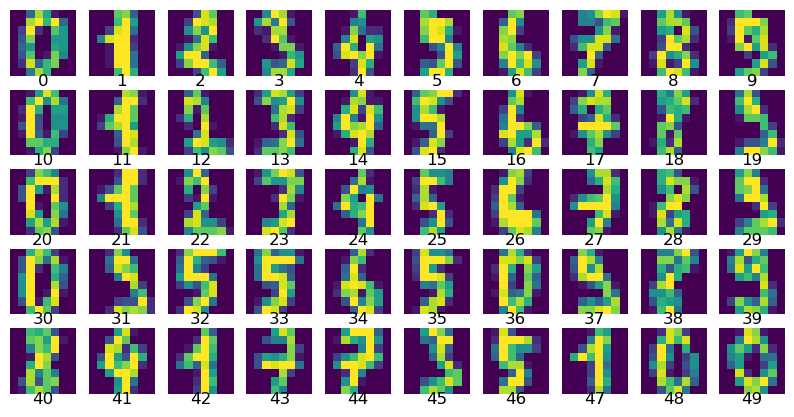

In [87]:


ncols = 10
nrows = 5
fig, ax = plt.subplots(ncols=ncols, nrows=nrows, figsize=(10, 5))
for i in range(nrows):
    for j in range(ncols):
        ax[i, j].imshow(sample[i * ncols + j])  # Assuming 'sample' contains the images
        ax[i, j].set_axis_off()
        ax[i, j].text(0.5, -0.15, str(i * ncols + j), fontsize=12, ha='center', transform=ax[i, j].transAxes)



In [88]:

fig.suptitle('MNIST Dataset')
plt.show()
